In [13]:
# Imported libraries I will need
# pandas & numpy to process data
# seaborn and matplotlib to visualize data
# sklearn to perform some processing


import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder from sklearn 


sns.set_theme(style="darkgrid")

In [14]:
# displays the dataset I will be working with in order to predict the blood pressure of individuals

cardio_data = pd.read_csv('datasets/train.csv')

cardio_data.head()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [15]:
# The shape of this dataset tells me total records

cardio_data.shape

(3390, 17)

In [16]:
# I will clean up this data before using it.

for col in cardio_data.columns:
    print(col)

# the id column (which corresponds to the patient ID) does not have any predictive power
# also not predicting heart disease for patients so I'll rid of these columns

id
age
education
sex
is_smoking
cigsPerDay
BPMeds
prevalentStroke
prevalentHyp
diabetes
totChol
sysBP
diaBP
BMI
heartRate
glucose
TenYearCHD


In [17]:
# Deleting Id & TenYearCHD column

bp_data = cardio_data.drop(['id', 'TenYearCHD'], axis =1)
bp_data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0


In [18]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical columns
bp_data['is_smoking_encoded'] = label_encoder.fit_transform(bp_data['is_smoking'])
bp_data['diabetes_encoded'] = label_encoder.fit_transform(bp_data['diabetes'])
bp_data['prevalentStroke_encoded'] = label_encoder.fit_transform(bp_data['prevalentStroke'])
bp_data['sex_encoded'] = label_encoder.fit_transform(bp_data['sex'])



In [19]:
# Datasets are likely to have null or missing values
# Isnull().sum will tell me how many values are missing

bp_data.isnull().sum()

age                          0
education                   87
sex                          0
is_smoking                   0
cigsPerDay                  22
BPMeds                      44
prevalentStroke              0
prevalentHyp                 0
diabetes                     0
totChol                     38
sysBP                        0
diaBP                        0
BMI                         14
heartRate                    1
glucose                    304
is_smoking_encoded           0
diabetes_encoded             0
prevalentStroke_encoded      0
sex_encoded                  0
dtype: int64

In [20]:
# Dropping null or N/A values

bp_data = bp_data.dropna()

bp_data.isnull().sum()


age                        0
education                  0
sex                        0
is_smoking                 0
cigsPerDay                 0
BPMeds                     0
prevalentStroke            0
prevalentHyp               0
diabetes                   0
totChol                    0
sysBP                      0
diaBP                      0
BMI                        0
heartRate                  0
glucose                    0
is_smoking_encoded         0
diabetes_encoded           0
prevalentStroke_encoded    0
sex_encoded                0
dtype: int64

In [21]:
# The describe function on the pandas DataFrame will provide a summary stat for this data

bp_data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,2927.0,49.507345,8.597191,32.00,42.00,49.00,56.00,70.0
education,2927.0,1.965494,1.017199,1.00,1.00,2.00,3.00,4.0
cigsPerDay,2927.0,9.112743,11.882784,0.00,0.00,0.00,20.00,70.0
BPMeds,2927.0,0.030065,0.170795,0.00,0.00,0.00,0.00,1.0
prevalentStroke,2927.0,0.006150,0.078192,0.00,0.00,0.00,0.00,1.0
prevalentHyp,2927.0,0.314315,0.464322,0.00,0.00,0.00,1.00,1.0
diabetes,2927.0,0.026990,0.162082,0.00,0.00,0.00,0.00,1.0
totChol,2927.0,237.129142,44.613282,113.00,206.00,234.00,264.00,600.0
sysBP,2927.0,132.626409,22.326197,83.50,117.00,128.50,144.00,295.0
diaBP,2927.0,82.906218,12.078873,48.00,74.50,82.00,90.00,142.5


In [22]:
# Machine learning algorithms work well when all of the numeric features are expressed in the same skill (will fix using standardization)
# Going to get rid of the BPMeds, prevalentHyp, and sysBP columns so only blood pressure-related column will be left (diastolic blood pressure diaBP)

bp_data =bp_data.drop(['BPMeds', 'prevalentHyp', 'sysBP'], axis = 1)
bp_data.head()


,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose,is_smoking_encoded,diabetes_encoded,prevalentStroke_encoded,sex_encoded
1,36,4.0,M,NO,0.0,0,0,212.0,98.0,29.77,72.0,75.0,0,0,0,1
2,46,1.0,F,YES,10.0,0,0,250.0,71.0,20.35,88.0,94.0,1,0,0,0
3,50,1.0,M,YES,20.0,0,0,233.0,88.0,28.26,68.0,94.0,1,0,0,1
4,64,1.0,F,YES,30.0,0,0,241.0,85.0,26.42,70.0,77.0,1,0,0,0
5,61,3.0,F,NO,0.0,0,0,272.0,121.0,32.80,85.0,65.0,0,0,0,0


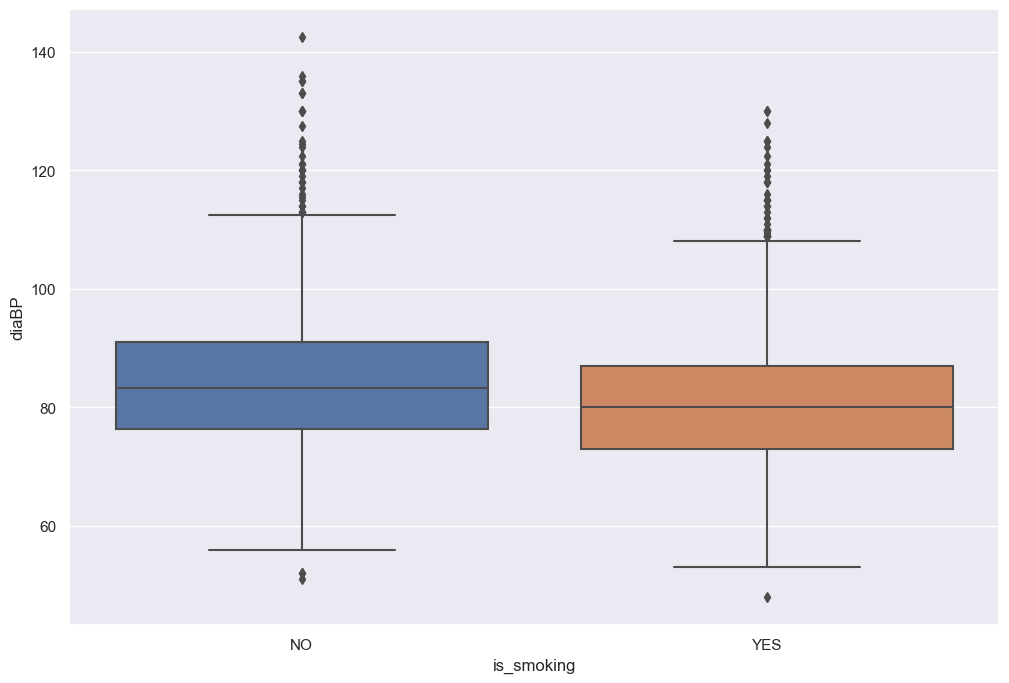

In [23]:
# Exploratory data analysis, looking for the impact of different predictors on diastolic blood pressure starting with whether the person smokes or not

plt.figure(figsize =(12, 8))
sns.boxplot(x='is_smoking', y='diaBP', data=bp_data);


The box plot reps tells me that the median blood pressure for nonsmokers seems to be higher than median blood pressure for smokers

Note: the centerline of the box is the median value

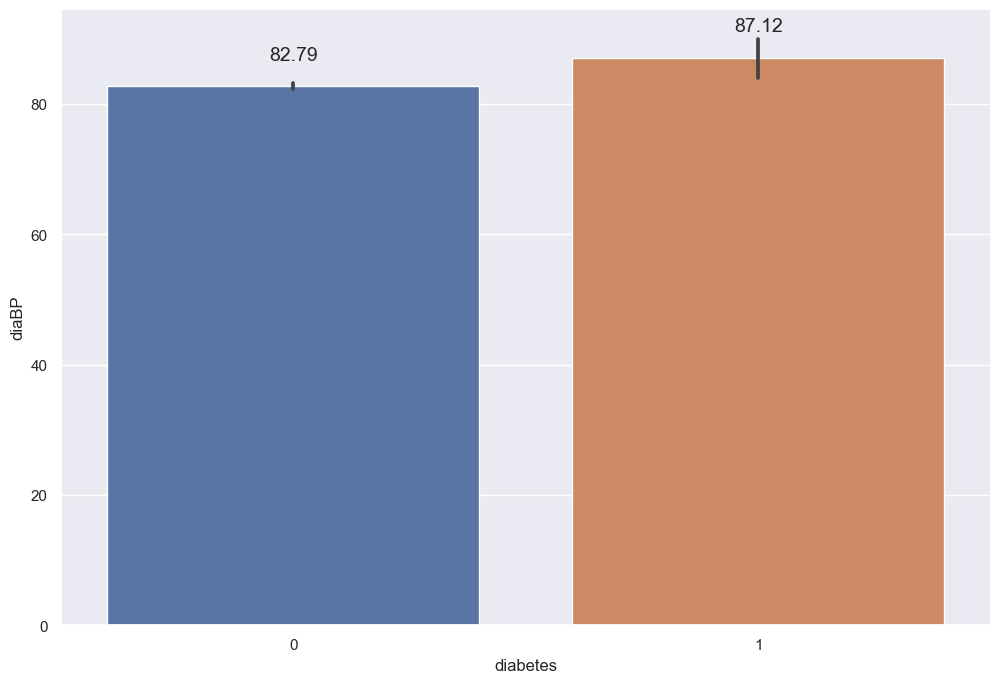

In [24]:
# Bar plot representation of whether an individual has diabetes or not, and the diastolic blood pressure.


f, ax = plt.subplots(figsize=(12, 8))

sns.barplot(data=bp_data, x='diabetes', y='diaBP')

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 4, round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize=14)

plt.show()

Bar plot indicates that on average individuals with diabetes have higher blood pressure ( a diastolic blood pressure a around 87).

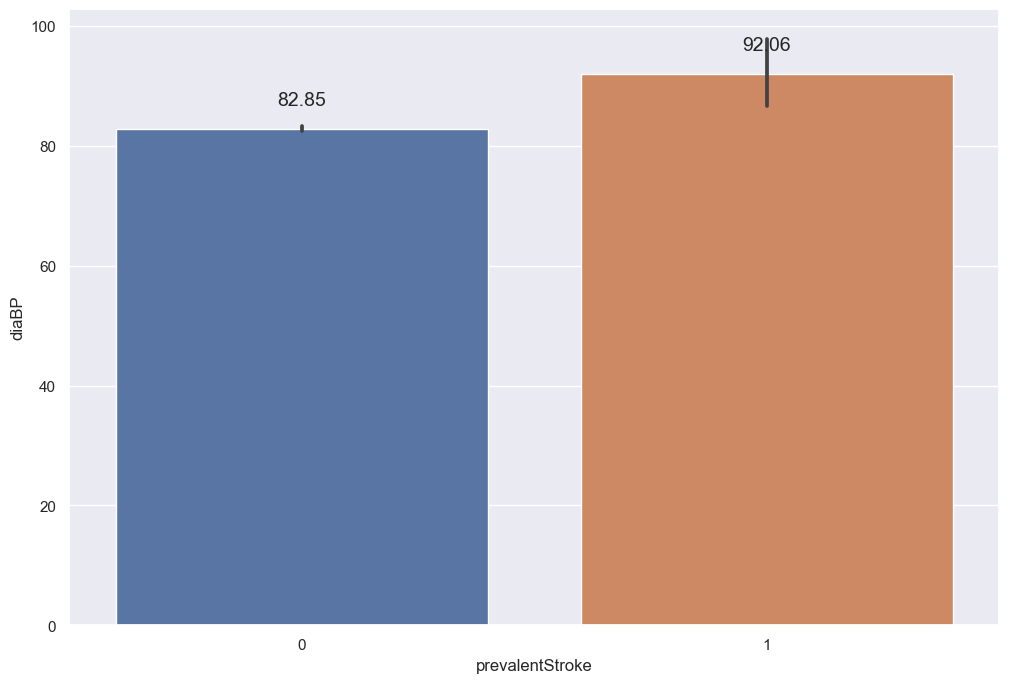

In [25]:
# Compare the average diastolic blood pressure of individuals who have or have not experienced a stroke.

f, ax = plt.subplots(figsize=(12, 8))

sns.barplot(data=bp_data, x='prevalentStroke', y='diaBP')

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 4, round(rect.get_height(), 2), 
            horizontalalignment='center', fontsize=14)

plt.show()

The bar plot showcases that indviduals who have had a stroke, have a higher diastolic blood pressure count overall.

The orange box with an average of 92

In [26]:
# Drop original categorical columns and calculate correlations
# Drop the original categorical columns

bp_data = bp_data.drop(['is_smoking', 'diabetes', 'prevalentStroke', 'sex'], axis=1)

In [27]:
# Using core function on pandas to calculate correlations between the various predictor variables and the target variable diastolic blood pressure.
# Using the Spearman correlation coefficient due to having ordinary data in the predictors as well (ex: is smoking, prevalent stroke, ect.)
# Spearmans correlation coeff. allows me to compute correlations when I have ordered catigorical data (ordinal data)


bp_corr = bp_data.corr(method='spearman')
print(bp_corr)


                              age  education  cigsPerDay   totChol     diaBP  \
age                      1.000000  -0.188446   -0.204252  0.306954  0.229036   
education               -0.188446   1.000000    0.027388 -0.022693 -0.064203   
cigsPerDay              -0.204252   0.027388    1.000000 -0.037292 -0.105820   
totChol                  0.306954  -0.022693   -0.037292  1.000000  0.190048   
diaBP                    0.229036  -0.064203   -0.105820  0.190048  1.000000   
BMI                      0.151229  -0.142068   -0.137484  0.151337  0.382744   
heartRate                0.011562  -0.049372    0.064169  0.090829  0.176149   
glucose                  0.106081  -0.018194   -0.094240  0.039553  0.056180   
is_smoking_encoded      -0.201947   0.036401    0.931566 -0.048513 -0.138071   
diabetes_encoded         0.110026  -0.060679   -0.051918  0.053037  0.057915   
prevalentStroke_encoded  0.050761  -0.025668   -0.053543  0.004797  0.057746   
sex_encoded             -0.036291   0.01

The correlation coefficient gives me the strength of the linear relationship between a pair of variables

- Its evident that every variable is pos. correlated with itself
- Notice that the BMI of an individual, pos. correlates with the diastolic blood pressure

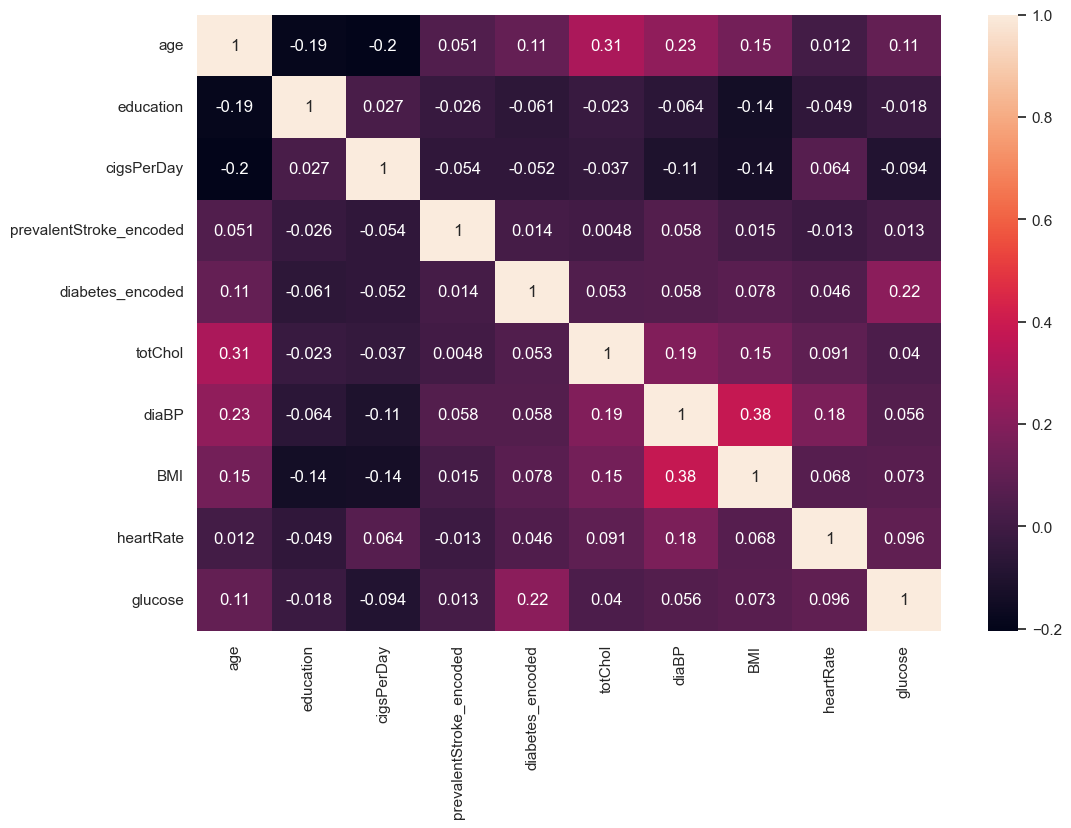

In [28]:
# Selecting only the columns you want to include in the heatmap, including encoded columns
columns_to_include = ['age', 'education', 'cigsPerDay', 'prevalentStroke_encoded', 'diabetes_encoded'
                        , 'totChol', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Calculate correlations for selected columns
bp_corr_selected = bp_data[columns_to_include].corr(method='spearman')

# Generate heatmap for selected columns
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(bp_corr_selected, annot=True)
plt.show()



Notice the diffrent values of the correlation coefficient correspond to diffrent colors of cells in this heat map.

In [33]:
# The gender of an individual and whether they smoke or not are string values in my data.
# Will lable and code them to convert to numeric
import pandas as pd
from sklearn import preprocessing

bp_data = pd.read_csv('datasets/train.csv')


label_encoding = preprocessing.LabelEncoder()

bp_data['sex'] = label_encoder.fit_transform(bp_data['sex'].astype(str))
bp_data['is_smoking'] = label_encoder.fit_transform(bp_data['is_smoking'].astype(str))


bp_data.head()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
